(0.0, 0.1)

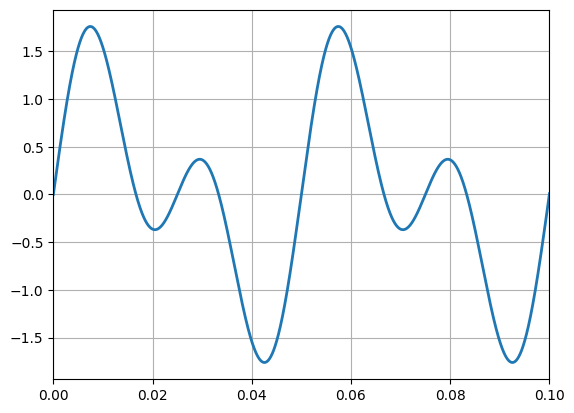

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 

f0 = 20 # Hz
Fs = 44100 # Hz 

Duration = 5 # secondes
n = np.arange(5*Fs) # sample 

a = 1 
phase = 0 

s  = a * np.sin( 2*np.pi*f0*n/Fs   + phase )
s += a * np.sin( 2*np.pi*2*f0*n/Fs + phase )
t = n/Fs 

plt.plot(t, s, lw=2)
plt.grid()
plt.xlim((0,0.1))


(0.0, 70.0)

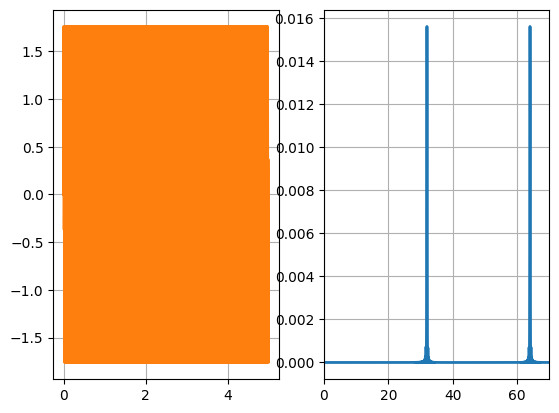

In [32]:
from numpy.fft import fft, fftshift  

f0 = 32 # Hz
Fs = 4096 # Hz 

Duration = 5 # secondes
n = np.arange(5*Fs) # sample 

a = 1 
phase = 0 

s  = a * np.sin( 2*np.pi*f0*n/Fs   + phase )
s += a * np.sin( 2*np.pi*2*f0*n/Fs + phase )

fen = np.hanning(len(s)) 

# s = s*fen
t = n/Fs 


nfft = 4096*20 #10*Fs
TF = fft(s, nfft)/nfft
# spectre = fftshift(20.*np.log10(np.abs(TF)**2))
spectre = fftshift((np.abs(TF)**2))
f = np.arange(nfft)/nfft*Fs - Fs/2

plt.subplot(121)
plt.plot(t, fen)
plt.plot(t, s, lw=2)
plt.grid()
# plt.xlim((0,0.1))

plt.subplot(122)
plt.plot(f, spectre, lw=2)
plt.grid()
plt.xlim((0,70))

In [ ]:
import librosa 
import librosa.display 
from IPython.display import Audio

path = librosa.ex('trumpet')
y, fs = librosa.load(path)

Audio(data=y, rate=fs)

C:\Users\anton\AppData\Local\Temp\ipykernel_20460\683529287.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectre = librosa.amplitude_to_db(librosa.stft(y))


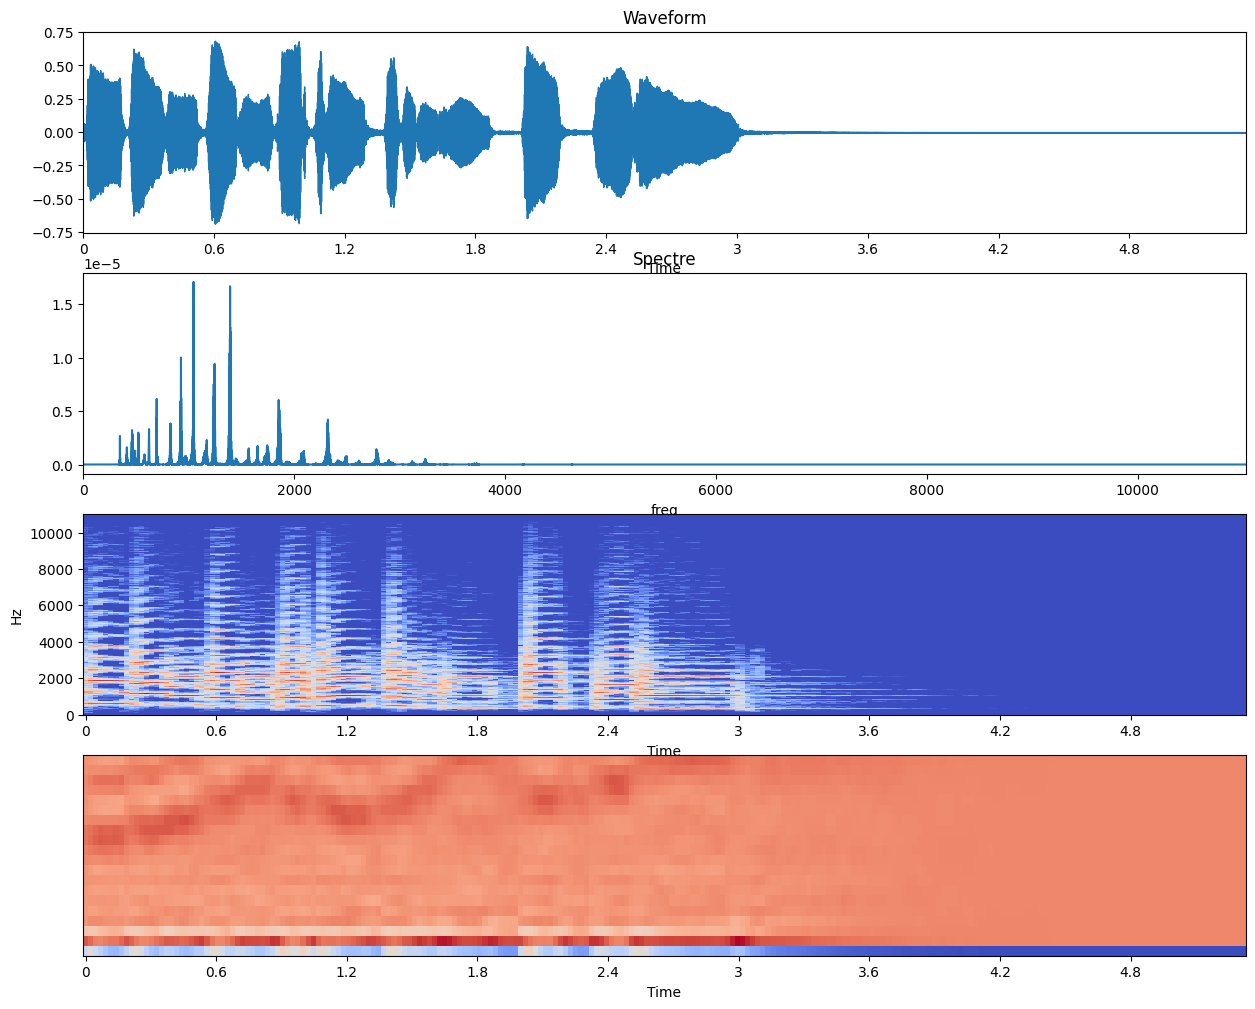

In [15]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(15,12))

plt.subplot(411)
librosa.display.waveshow(y, sr=fs)
plt.title('Waveform')
plt.xlim((0, len(y)/fs))

plt.subplot(412)
X = np.abs(np.fft.fft(y)/len(y))**2
f = np.linspace(0, fs, len(X))
plt.plot(f, X)
plt.xlim((0,fs/2))
plt.xlabel('freq')
plt.title('Spectre')

plt.subplot(413)
spectre = librosa.amplitude_to_db(librosa.stft(y))
librosa.display.specshow(spectre, sr=fs, x_axis='time', y_axis='hz')

plt.subplot(414)
# spectre cepstre
mfccs = librosa.feature.mfcc(y=y, sr=fs, n_mfcc=20)
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

$$spectre = \| FFT(x) \|^2$$ si tu garde la phase $$\phi$$

on peut revenir au signal en $$signal = \sqrt(spectre) * \exp(i*\phi)$$
$$spectre_{db} = 20*\log_{10}(\| FFT(x) \|^2)$$
$$cepstre = \sqrt{(spectre_{db})} * \exp(i*\phi)$$